<a href="https://www.kaggle.com/code/pelayomencos/cyclist-case-study?scriptVersionId=116887754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Google Certificate Capstone Project - Case Study 1

![Image_1](https://domf5oio6qrcr.cloudfront.net/medialibrary/4374/benefits-of-cycling.jpg)

# SCENARIO



You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.


### Characters and teams

* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program

### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# 1. ASK 

How do casual riders and annual members use Cyclistic bikes differently?


Buisness task: Study bike ride data to see how casual riders and annual members differ, in order to help Cylist elaborate a marketing campaign with the goal of making more casual users become annual members.

# 2. PREPARE

We will use the previous 12 months of Cyclist trip data. 

#### Description of the data we will be using 

* Twelve months: April 2021 to March 2022. Each month is stored in a CSV file. The data is therefore rather recent. 
* Comprehensive: the dataset contains all the rides done with Cyclist bikes between April 2021 and March 2022. 
* Publically available dataset. 
* Respect for privacy: no personal information of the user is included. 

#### Limitations of the data 

* Having demographical information (age, sex, type of job etc.) would be very useful to be able craft more detailed recommendations. 


#### Evaluation of the data

* The dataset is reliable, contains a vast number of datapoints, and has interesting variables which will allow us to advance in our buisness task. 

In [1]:
#load libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#open the files 
data1 = pd.read_csv("../input/cyclistic-bike-share/202201-divvy-tripdata.csv")
data2 = pd.read_csv("../input/cyclistic-bike-share/202202-divvy-tripdata.csv")
data3 = pd.read_csv("../input/cyclistic-bike-share/202203-divvy-tripdata.csv")
data4 = pd.read_csv("../input/cyclistic-bike-share/202104-divvy-tripdata.csv")
data5 = pd.read_csv("../input/cyclistic-bike-share/202105-divvy-tripdata.csv")
data6 = pd.read_csv("../input/cyclistic-bike-share/202106-divvy-tripdata.csv")
data7 = pd.read_csv("../input/cyclistic-bike-share/202107-divvy-tripdata.csv")
data8 = pd.read_csv("../input/cyclistic-bike-share/202108-divvy-tripdata.csv")
data9 = pd.read_csv("../input/cyclistic-bike-share/202109-divvy-tripdata.csv")
data10 = pd.read_csv("../input/cyclistic-bike-share/202110-divvy-tripdata.csv")
data11 = pd.read_csv("../input/cyclistic-bike-share/202111-divvy-tripdata.csv")
data12 = pd.read_csv("../input/cyclistic-bike-share/202112-divvy-tripdata.csv")

In [3]:
#merge files into one single dataframe 
data = pd.concat([data1, data2, data3, data4, data5, data6,
                 data7, data8, data9, data10, data11, data12])

In [4]:
#dimensions of our dataframe
data.shape

(5723532, 13)

Our dataframe has around 5.7 million rows; and 13 different columns - that's a lot of data! Let's see what kind of information do our columns contain: 


In [5]:
data.iloc[:5]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


Columns we have: 


**1. ride_id** : Numeric identifier of each ride.

**2. rideable_type**: Type of bike driven: electric, classic, docked. 

**3. started_at**: Hour and date at which the bike ride began. 

**4. ended_at**: Hour and date at which the bike ride ended. 

**5. start_station_name**: Name of the station where the bike ride began.

**6. start_station_id**: Numeric identifier of the station. We will not be using this column, as the previous column already gives us the information we need. 

**7. end_station_name**: Name of the station where the bike ride ended. 

**8. end_station_id**: Numeric identifier of the station. We will not be using this column, as the previous column already gives us the information we need.

**9. start_lat**: No use 

**10. start_lng**: No use

**11. end_lat**: No use

**12. end_lng**: No use

**13. member_casual**: Type of user: casual rider or annual member. 


# 3. PROCESS

### 3.1. CLEAN

Let's check if there are any duplicates among our rows. 

In [6]:
print(data[data.duplicated(['ride_id'])])

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []


Great, there aren't any duplicates

Another important aspect we have to check is if only the labels we expect are present for the categorical data variables:


In [7]:
print(data['member_casual'].unique())
print(data['rideable_type'].unique())

['casual' 'member']
['electric_bike' 'classic_bike' 'docked_bike']


Good, the labels we have make perfect sense.

### 3.2. ORGANIZE

Let's get rid of the columns we will not make use of. 

In [8]:
#drop columns we are not interested in
data.drop(['start_station_id', 'end_station_id', 
           'start_lat','start_lng',
          'end_lat', 'end_lng'], axis = 1, inplace=True)

Create new columns that can be interesting for analysis, such as the duration of each ride or the day of the week in which the ride took place.  

In [9]:
#change format to be able to do operations
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [10]:
#create column that calculates ride duration
data['ride_length'] = (data['ended_at'] - data['started_at']) / pd.Timedelta(minutes=1)
data['ride_length'] = data['ride_length'].astype('int32')

In [11]:
#create column that calculates day of the week
data['day'] = data['started_at'].dt.day_name()

In [12]:
#column with name of month
data['month'] = data['started_at'].dt.strftime("%B")

In [13]:
#what is our dataframe looking like?
data.iloc[:3]

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,day,month
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,2,Thursday,January
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,casual,4,Monday,January
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,member,4,Tuesday,January


# 4. ANALYSE & 5. SHARE


# 4.1. Casual Riders vs Annual Members

How many casual riders are there, in comparaison to annual members?

<AxesSubplot:title={'center':'Casual users vs Members'}, ylabel='member_casual'>

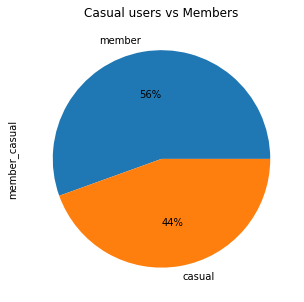

In [14]:
member_counts = data['member_casual'].value_counts()
member_counts.plot(kind='pie',
                  autopct='%1.0f%%',
                  title='Casual users vs Members',
                  figsize = (8, 5))

There are more members than casual users – but the difference is not huge: casual users make up for 44% of the total number amount of rides in the year. 

**INFO 1:** A large portion (44%) of bikers at Cyclist are casual riders. 

# 4.2. Type of bike 

In [15]:
member_bike_count = pd.pivot_table(data, values = 'ride_id', index = ['member_casual', 'rideable_type'],  aggfunc='count')

In [16]:
member_bike_count = member_bike_count.reset_index()

In [17]:
member_bike_count_group = member_bike_count.groupby('member_casual')
member_bike_count['percentage'] = member_bike_count_group['ride_id'].apply(lambda x: round(x / x.sum() * 100,1))

In [18]:
member_bike_count['percentage'] = member_bike_count['percentage'].astype(str) + '%'

In [19]:
fig = px.bar(member_bike_count, x = 'member_casual', 
            y = 'ride_id', color = 'rideable_type',
            barmode='group', text = 'percentage')
fig.update_traces(textangle=0)

Both kind of users ride classic bikes more frequently. 
The proportions are nevertheless different: members tend to use much more clasic bikes than electric ones (62.7% vs 37.3%), whereas this difference is smaller for casual riders (49.4% vs 38.7%). 

**INFO 2:** Members opt for classic bikes much more than casual riders (who use a lot of electric and docked bikes). 

# 4.3 WHEN?

# 4.3.1. Day of the week

Do casual riders and annual members ride on the same days?

In [20]:
member_day = pd.pivot_table(data, values = 'ride_id', index = 'day', columns = 'member_casual', aggfunc='count')

In [21]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_day = member_day.reindex(index=day_order)

In [22]:
px.line(member_day)

**INFO 3:** Members bike more on weekdays (mondays to fridays), wheras casual's activity peaks on weekends.  

# 4.3.2. Month of the year

In [23]:
#month
member_month = pd.pivot_table(data, values = 'ride_id', index = 'month', columns = 'member_casual', aggfunc='count')
month_order =  ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
member_month = member_month.reindex(index=month_order)

In [24]:
px.line(member_month, markers=True)

The distribution for monthly rides has a similar shape for both type of users - peak activity takes places during the summer months, and steadily decreases afterwards (before starting to increase again around February). This shape is more pronounced for the casual group of riders: activity is very high on summers and very low during the cold months.

**INFO 4:** Both kind of users bike more when the climate is mild or hot, and much less when it is cold, but this effect is more pronounced in the case of casual riders. 



# 4.3.3. Hour of the day

In [25]:
#create column where there is only information on the hour
data['hour'] = data['started_at'].dt.hour

In [26]:
member_hour = pd.pivot_table(data, values = 'ride_id', index = 'hour', columns = 'member_casual', aggfunc='count')

In [27]:
px.line(member_hour, markers=True)

Member activity is clearly defined by two clear activity peaks: the first one around 8h, and the second, and most important one, around 17h. Indeed, those hours correspond to the time of the day when people (usually) start and finish work. 
Interestingly, the main difference with the shape of casuals rides compared to members is that there is no peak around 8h – which suggests that people who are not members may use the bike to get back from work, but not to *go to work*.  

## Hour of the day: weekdays vs weekends

In [28]:
#filter data
weekday_data = data.loc[(data['day'] != 'Saturday') & (data['day'] != 'Sunday')]
weekend_data = data.loc[(data['day'] == 'Saturday') | (data['day'] == 'Sunday')]

### Weekdays

In [29]:
#weekdays
member_hour_weekday = pd.pivot_table(weekday_data, values = 'ride_id', index = 'hour', columns = 'member_casual', aggfunc='count')
px.line(member_hour_weekday, markers=True)

When we only look at the weekday hourly data for rides, the previous shapes observed for both groups are amplified: members activity is defined by two clear peaks (8h and 17h), whereas casual's activity slowly increases until reaching its apex at 17h, and then rapidly falls. 

### Weekends

In [30]:
#weekends
member_hour_weekend = pd.pivot_table(weekend_data, values = 'ride_id', index = 'hour', columns = 'member_casual', aggfunc='count')
px.line(member_hour_weekend, markers=True)

Activity is very different on weekends. It has the same shape for both, and the peaks are smoother (with a plateau at the apex. The difference is that at peak hours (from 11h to 18h), there are many more casual riders than members. 

**INFO 6**: 
Members ride on weekdays, mostly at 8h and at 17h; whereas casuals ride on weekends (11-18h). The hourly data suggests that members ride to commute, whereas casuals ride for leisure. 

# 4.4. Ride length 

How does the ride duration differ between casual riders and annual members?

In [31]:
compare_ride = pd.pivot_table(data, values = 'ride_length', index = 'member_casual')

In [32]:
px.bar(compare_ride)

**INFO 7**: The mean length of a bike ride is more than double for annual members. 

# 4.4.1 Ride duration per month

In [33]:
#ride length per day and month 
compare_ride = pd.pivot_table(data, values = 'ride_length', index = 'month', columns = 'member_casual')
month_order =  ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
compare_ride = compare_ride.reindex(index=month_order)

In [34]:
px.bar(compare_ride, barmode = 'group')


Ride length is higher for both groups in summer, although this is especially the case for the casual users group. 

# 4.4.2 Ride duration per day of the week

In [35]:
member_day = pd.pivot_table(data, values = 'ride_length', index = 'day', columns = 'member_casual')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
member_day = member_day.reindex(index=day_order)

In [36]:
px.bar(member_day, barmode = 'group')

Ride durations are higher on weekends; here again, this is especially the case for the casual riders group. 

**INFO 8**: For both groups, the length of rides is higer on summers and on weekends; this is more pronounced for casuals. 

# 4.5 What stations?

In [37]:
#caculate the most frequent start stations 
top_start_stations = (data.groupby(['start_station_name', 'member_casual'])['start_station_name']
                      .count()
                      .reset_index(name='count')
                      .sort_values(by=['member_casual','count'],ascending=[True,False])
                      .groupby('member_casual')
                      .head(10))
top_start_stations = top_start_stations.assign(type_station='start')
top_start_stations = top_start_stations.rename(columns={'start_station_name': 'station'})

In [38]:
#caculate the most frequent end stations 
top_end_stations = (data.groupby(['end_station_name', 'member_casual'])['start_station_name']
                      .count()
                      .reset_index(name='count')
                      .sort_values(by=['member_casual','count'],ascending=[True,False])
                      .groupby('member_casual')
                      .head(10))
top_end_stations = top_end_stations.assign(type_station='end')
top_end_stations = top_end_stations.rename(columns={'end_station_name': 'station'})

In [39]:
top_stations = pd.concat([top_start_stations,top_end_stations])

In [40]:
top_stations['station'].value_counts()

Wells St & Concord Ln                 4
Wells St & Elm St                     3
Streeter Dr & Grand Ave               2
Clark St & Elm St                     2
Wabash Ave & Grand Ave                2
Broadway & Barry Ave                  2
Clinton St & Madison St               2
St. Clair St & Erie St                2
Wells St & Huron St                   2
Dearborn St & Erie St                 2
Kingsbury St & Kinzie St              2
Millennium Park                       2
Clark St & Lincoln Ave                2
Theater on the Lake                   2
Shedd Aquarium                        2
Michigan Ave & Oak St                 2
Lake Shore Dr & Monroe St             1
DuSable Lake Shore Dr & Monroe St     1
DuSable Lake Shore Dr & North Blvd    1
Lake Shore Dr & North Blvd            1
Clinton St & Washington Blvd          1
Name: station, dtype: int64

In [41]:
#import libraries for maps
import folium
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [42]:
chicago_location = [41.8781136, -87.6297982]

# Create the map object centered on Chicago
map_osm = folium.Map(location=chicago_location, zoom_start=13)

# Group the dataframe by 'station'
grouped_stations = top_stations.groupby('station')

# Iterate through the grouped stations and add a marker for each one to the map
for station, station_data in grouped_stations:
    if (station_data['member_casual']=='member').any() and (station_data['member_casual']=='casual').any():
        color = 'purple'
    elif (station_data['member_casual']=='member').any():
        color = 'blue'
    elif (station_data['member_casual']=='casual').any():
        color = 'red'
    else:
        color = 'black'
        
    location = geolocator.geocode(station+" Chicago, IL")
    if location:
        folium.Marker([location.latitude, location.longitude],
                      popup=station,
                      icon=folium.Icon(color=color)).add_to(map_osm)
   
# Display the map
map_osm

* Stations in *blue* are the most frequent stations for members. 
* Stations in *red* are the most frequent for casual riders.
* Stations in *purple* are the most frequent stations for both members and casual riders. 

The above map shows some very interesting patterns. The most used bike stations are diferent for members and casuals riders. Crucially, the most frequent stations  for casual riders are those next to the lake, while for members they tend to be more in the inner city. This reinforces our previous point: casual riders in general bike to have fun, for pleasure, so it makes sense they have a ride close to what seems as the most pleasant place (the lake side). Members on the hand, use bikes for commuting mostly. 

It is intersting however to note that there is a few stations where there is a convergence: Wells St & Concord Ln, Wells St & Elm St and Wabash Ave & Grand Ave. 

**INFO 9**: Casual riders tend to bike next to the lake, wheras annual members tend to bike in the inner city. 

# 6. ACT 

# 6.1. Recap 

Our analysis has revealed clear differences between members and casuals. To summarise:

* There are more members than casuals (56% to 44%).
* Members clearly opt for classic bikes, whereas casuals use classic bikes but also electric bikes.
* There are more casual rides when the weather is good (summer) and more members when the weather is bad (winter).
* Members tend to bike on weekdays; casuals on weekends.
* Members biking is concentrated around two time of the day: 8h and 17h (on weekdays), while casuals mostly bike from 11h to 18h (on weekends).
* Casuals take much longer rides than members (more than double).
* Members tend to bike in the inner city, while casuals tend to bike by the lake-side. 


Fundamentally, these differences reflect the fact that both groups bike for different reasons: **Members use bikes to commute, while casuals use Cyclist bikes for leisure**. 

# 6.2. Advice

To attract casual riders in order to become members, the marketing team at Cyclist should target casual users who use Cylist bikes in the same way as members (for instance those that use the bikes to commute on weekdays, around 8h and 17h; who take short rides, and who bike in the inner city). 